In [65]:
import pandas as pd

In [66]:
vul_data = pd.read_csv("./affected_packages_npm_with_all.csv",delimiter=",")

In [67]:
vul_data.groupby("vul_project_id").size()

vul_project_id
127732      4667
138017        33
141005        26
152324         3
157800       230
160267         3
160277         5
164236      1831
171725        16
177357     17616
272771      4020
276738       795
278126        81
282914       225
288506      2513
295253       444
295772      9912
299787       246
301758        13
308318        23
311863       346
312067     11123
312181       806
312375        22
318372         2
320164       123
330622       104
333360       949
657682       233
702847         1
736965       306
764553        45
856637      3029
945180         1
1150354     1420
1499387       18
1554148        1
1589520       27
2111819       19
2158900       33
2233905      190
2616052        2
2705971        1
2775836       31
3229321        7
3258308        9
3655233        1
4433945        2
dtype: int64

In [68]:
vul_data["vul_months"] = (vul_data["vul_end_timestamp"] - vul_data["vul_start_timestamp"]) / (3600 * 24 * 30)

In [100]:
vul_data.query('compliantType == 2 and vul_end_timestamp < 1674091000').loc[:,["project_id", "vul_project_id","vul_start_datetime","vul_end_datetime", "vul_start_dependency_compliant","vul_months", 'compliantType']]

,project_id,vul_project_id,vul_start_datetime,vul_end_datetime,vul_start_dependency_compliant,vul_months,compliantType
6,142998,177357,2014-10-19 23:03:01 +0000 UTC,2019-12-10 01:31:48 +0000 UTC,*,62.570111,2
25,174533,177357,2014-09-18 19:15:54 +0000 UTC,2019-12-10 01:31:48 +0000 UTC,*,63.608701,2
51,126339,177357,2014-01-23 01:28:19 +0000 UTC,2019-12-10 01:31:48 +0000 UTC,*,71.566747,2
52,126623,177357,2013-11-27 13:33:23 +0000 UTC,2019-12-10 01:31:48 +0000 UTC,*,73.449963,2
55,126736,177357,2014-07-03 13:35:32 +0000 UTC,2019-12-10 01:31:48 +0000 UTC,*,66.183247,2
...,...,...,...,...,...,...,...
57415,3304693,856637,2018-08-23 01:36:03 +0000 UTC,2019-07-10 00:20:41 +0000 UTC,*,10.698255,2
60198,2297989,1150354,2017-05-26 00:54:28 +0000 UTC,2019-07-10 00:20:07 +0000 UTC,*,25.832538,2
60199,2298062,1150354,2017-05-26 00:59:39 +0000 UTC,2019-07-10 00:20:07 +0000 UTC,*,25.832418,2
60441,2297989,1150354,2017-05-26 00:54:28 +0000 UTC,2019-07-10 00:20:07 +0000 UTC,*,25.832538,2


<AxesSubplot: >

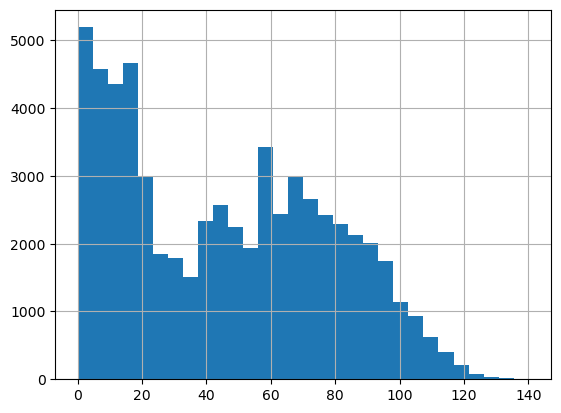

In [70]:
vul_data["vul_months"].hist(bins=30)

In [71]:
vul_data.groupby("compliantType").size()

compliantType
1    47135
2     1591
3     9744
4      322
5     2761
dtype: int64

# サバイバル分析

In [72]:
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt

In [73]:
vul_data_compliant = vul_data[vul_data["compliantType"] == 1]
vul_data_permissive = vul_data[vul_data["compliantType"] == 2]
vul_data_restrictive = vul_data[vul_data["compliantType"] == 3]

In [74]:
status = vul_data["vul_end_timestamp"] < 1674091000

In [75]:
status

0        False
1        False
2        False
3        False
4        False
         ...  
61548    False
61549    False
61550    False
61551    False
61552    False
Name: vul_end_timestamp, Length: 61553, dtype: bool

Text(0.5, 0, 'time $t$')

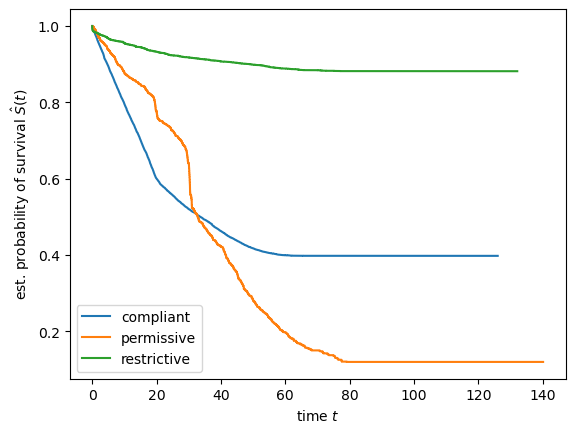

In [76]:
time_compliant, survival_prob_compliant = kaplan_meier_estimator(vul_data_compliant["vul_end_timestamp"] < 1674091000, vul_data_compliant["vul_months"])
time_permissive, survival_prob_permissive = kaplan_meier_estimator(vul_data_permissive["vul_end_timestamp"] < 1674091000, vul_data_permissive["vul_months"])
time_restrictive, survival_prob_restrictive = kaplan_meier_estimator(vul_data_restrictive["vul_end_timestamp"] < 1674091000, vul_data_restrictive["vul_months"])

plt.step(time_compliant, survival_prob_compliant, where="post", label="compliant")
plt.step(time_permissive, survival_prob_permissive, where="post", label="permissive")
plt.step(time_restrictive, survival_prob_restrictive, where="post", label="restrictive")

plt.legend()

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

## 生存分析(打ち切りなしver)

Text(0.5, 0, 'time $t$')

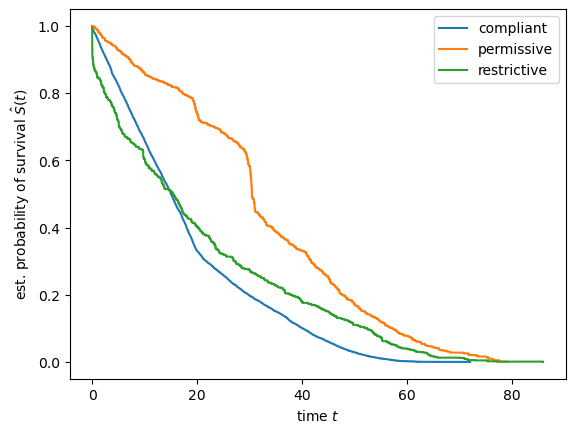

In [77]:
time_compliant, survival_prob_compliant = kaplan_meier_estimator(vul_data_compliant[vul_data_compliant["vul_end_timestamp"] < 1674091000]["vul_end_timestamp"] < 1674091000, vul_data_compliant[vul_data_compliant["vul_end_timestamp"] < 1674091000]["vul_months"])

time_permissive, survival_prob_permissive = kaplan_meier_estimator(vul_data_permissive[vul_data_permissive["vul_end_timestamp"] < 1674091000]["vul_end_timestamp"] < 1674091000, vul_data_permissive[vul_data_permissive["vul_end_timestamp"] < 1674091000]["vul_months"])
time_restrictive, survival_prob_restrictive = kaplan_meier_estimator(vul_data_restrictive[vul_data_restrictive["vul_end_timestamp"] < 1674091000]["vul_end_timestamp"] < 1674091000, vul_data_restrictive[vul_data_restrictive["vul_end_timestamp"] < 1674091000]["vul_months"])

plt.step(time_compliant, survival_prob_compliant, where="post", label="compliant")
plt.step(time_permissive, survival_prob_permissive, where="post", label="permissive")
plt.step(time_restrictive, survival_prob_restrictive, where="post", label="restrictive")

plt.legend()

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

<AxesSubplot: >

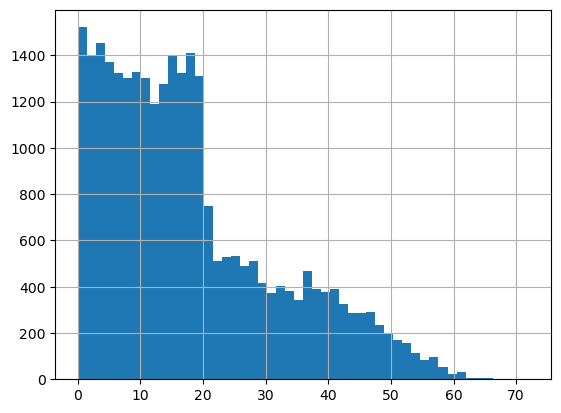

In [81]:
vul_data_compliant[vul_data_compliant["vul_end_timestamp"] < 1674091000]["vul_months"].hist(bins=50)

<AxesSubplot: >

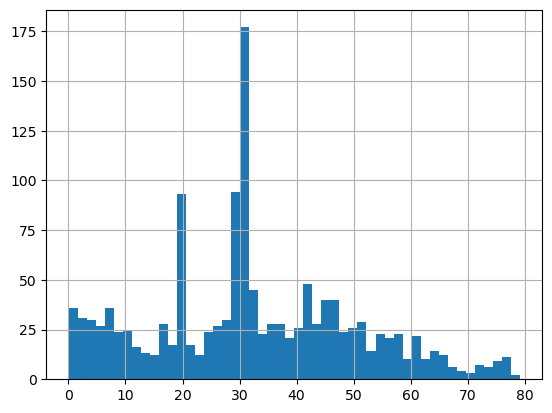

In [82]:
vul_data_permissive[vul_data_permissive["vul_end_timestamp"] < 1674091000]["vul_months"].hist(bins=50)

<AxesSubplot: >

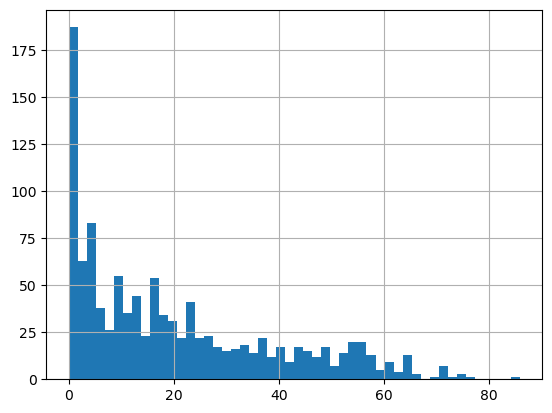

In [83]:
vul_data_restrictive[vul_data_restrictive["vul_end_timestamp"] < 1674091000]["vul_months"].hist(bins=50)